In [1]:
# let's import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [2]:
# Let's load the data set from the keras dataset
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(y_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
# for improvement of accuracy we need to convert the matrix range between 0-1
X_train = X_train/256
X_test = X_test/256

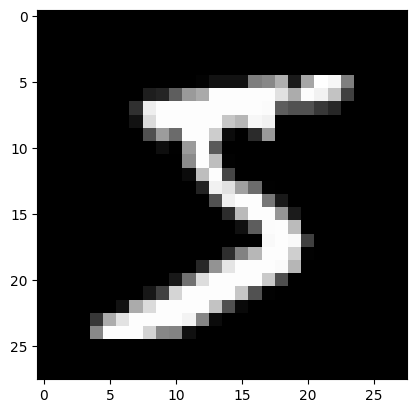

In [7]:
plt.imshow(X_train[0],cmap='gray')

In [8]:
y_train[:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

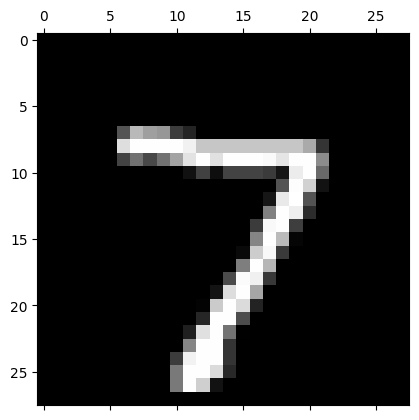

In [9]:
plt.matshow(X_test[0],cmap='gray')

In [10]:
y_test[0]

7

In [11]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)
X_train_flatten.shape

(60000, 784)

In [12]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
# Let's implement the model
model = keras.Sequential([
    keras.layers.Dense(50,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

# compilation of the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
# let run the model
model.fit(X_train_flatten,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3213 - accuracy: 0.9085
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1624 - accuracy: 0.9521
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1216 - accuracy: 0.9639
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0995 - accuracy: 0.9707
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0829 - accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0711 - accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0608 - accuracy: 0.9814
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0537 - accuracy: 0.9835
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0482 - accuracy: 0.9843
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.042

In [15]:
loss, accuracy=model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0928 - accuracy: 0.9720


In [16]:
print(loss)
print(accuracy)

0.09283078461885452
0.972000002861023


In [17]:
# Let's predict the model whether it's working properly or not

In [20]:
y_predicted=model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


In [24]:
y_predicted[2]

array([3.7503653e-04, 9.9811089e-01, 7.2500199e-02, 1.4960356e-03,
       1.4398861e-03, 9.2408263e-05, 1.2620283e-02, 2.7365410e-01,
       1.3243774e-01, 2.4829775e-05], dtype=float32)

In [30]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [25]:
y_test[2]

1

In [26]:
np.argmax(y_predicted[2])

1

In [32]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    0,    1,    1,    2,    3,    3,    3],
       [   0, 1123,    3,    0,    0,    1,    4,    2,    2,    0],
       [   2,    0, 1009,    2,    2,    0,    4,    7,    6,    0],
       [   0,    2,   16,  956,    0,    6,    0,   10,   10,   10],
       [   3,    1,    6,    1,  944,    0,    2,    6,    2,   17],
       [   5,    1,    0,    6,    1,  850,   14,    2,    7,    6],
       [   5,    2,    2,    1,    7,    1,  940,    0,    0,    0],
       [   1,    3,    7,    0,    0,    1,    0, 1010,    3,    3],
       [   6,    0,    3,    1,    3,    2,    8,    4,  942,    5],
       [   2,    4,    0,    3,    7,    3,    0,    7,    3,  980]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'Truth')

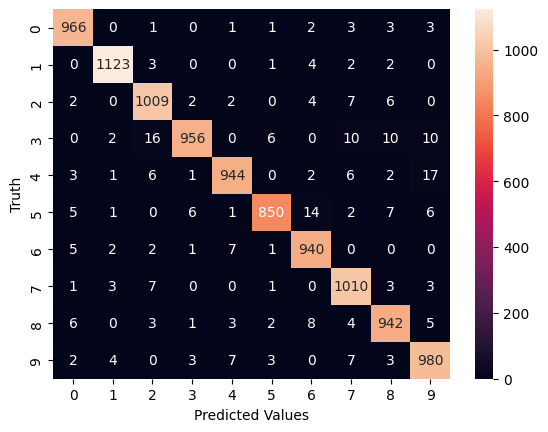

In [35]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Truth')